# Algorithmes & Complexité Affectation : Tri

Ce Notebook traite des différents algorithmes de tri dans le cadre du d'algorithmique et de complexité.

En informatique, les algorithmes de tri permettent de mettre en ordre les éléments d'une liste. Un tri efficace est important pour optimiser l'efficacité d'algorithmes tels que la recherche, la fusion et l'agrégation. La sortie doit être une permutation monotone, c'est-à-dire qu'elle doit respecter le type d'ordre spécifié et conserver tous les éléments d'origine. 

Vers 1951, Betty Holberton faisait partie des auteurs des premiers algorithmes de tri travaillant sur l'ENIAC, le premier ordinateur électronique programmable à usage général achevé en 1945. Bubble Sort, un algorithme de tri dont la complexité temporelle est O(n²), a été analysé dès 1956. De nouveaux algorithmes sont encore inventés, comme Timsort en 2002. Les algorithmes de tri sont très étudiés dans les cours d'introduction à l'informatique car ils introduisent des concepts tels que la notation big O, les algorithmes de division et de conquête, la récursion, les tas, les arbres binaires, la complexité dans le meilleur, le pire et la moyenne des cas...etc.

Dans ce document, nous allons explorer quelques algorithmes de tri en pseudo-code, puis tester chaque algorithme avec des tableaux aléatoires de tailles allant de 10 à 20 000 entiers. Nous utilisons une série de tableaux aléatoires afin de pouvoir tracer la complexité temporelle de chaque algorithme. L'utilisation de la même longueur de tableau nous permettra de faire des comparaisons. 

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math 
import time

#Create a list of random integers of length n
def createRandomList(n: int) -> list:
    random_list = []
    for i in range(0, n):
        random_list.append(random.randint(0,1000))
    return random_list

### Tri rapide

Essayons un algorithme de tri plus rapide et moins complexe en termes de temps. Pour cette partie, examinons le tri rapide :

QuickSort est un algorithme de tri basé sur le principe Diviser pour régner, qui choisit un élément comme pivot et partitionne le tableau donné autour du pivot choisi en plaçant le pivot à sa position correcte dans le tableau trié.

L'algorithme comporte principalement trois étapes :
1. Choisir un pivot
2. Partitionner le tableau autour du pivot. Après la partition, on s'assure que tous les éléments sont plus petits que tous les éléments de droite et on obtient l'index du point final des éléments les plus petits. La gauche et la droite peuvent ne pas être triées individuellement.
3. Appeler récursivement les deux sous-ensembles gauche et droit partitionnés.
4. Nous arrêtons la récursivité lorsqu'il ne reste plus qu'un seul élément.

**Complexité temporelle
- Meilleur cas:** Ω(N log N) - Atteint lorsque le pivot divise le tableau en deux moitiés égales.
- Cas moyen:** θ(N log N) - Donne généralement de bons résultats dans la pratique.
- Cas le plus défavorable:** O(N²) - Se produit en cas de partitions déséquilibrées, par exemple lorsque le tableau est déjà trié et que le pivot le plus défavorable est choisi. Les stratégies d'atténuation comprennent l'utilisation de techniques telles que la médiane des trois et les algorithmes aléatoires.

**Avantages
- Efficace pour les grands ensembles de données grâce à une faible surcharge.
- Adapté à la mémoire cache car il trie en place sans tableaux supplémentaires.
- Algorithme de tri polyvalent le plus rapide lorsque la stabilité n'est pas requise.
- Récursif à la queue, ce qui permet d'optimiser les appels à la queue.

**Inconvénients
- Mauvaise complexité temporelle dans le pire des cas (O(N²)) si les pivots sont mal choisis.
- N'est pas idéal pour les petits ensembles de données.
- N'est pas stable ; l'ordre relatif des éléments égaux peut ne pas être préservé.

FUNCTION partition(array, low, high):
    pivot = array[high]               // Choose the last element as pivot
    i = low - 1                       // Pointer for the smaller element

    // Iterate through the array
    FOR j FROM low TO high - 1 DO:
        IF array[j] < pivot THEN:
            i = i + 1                 // Increment index of smaller element
            SWAP array[i] WITH array[j] // Swap current element with the element at index i

    SWAP array[i + 1] WITH array[high] // Move pivot to its correct position
    RETURN i + 1                      // Return the partitioning index

FUNCTION quickSort(array, low = None, high = None):

    IF low IS None THEN:
        low = 0                       // Initialize low if not provided
    IF high IS None THEN:
        high = LENGTH(array) - 1      // Initialize high if not provided

    IF low < high THEN:
        pi = partition(array, low, high) // Partition the array
        quickSort(array, low, pi - 1   // Recursively sort elements before partition
        quickSort(array, pi + 1, high) // Recursively sort elements after partition
END FUNCTION

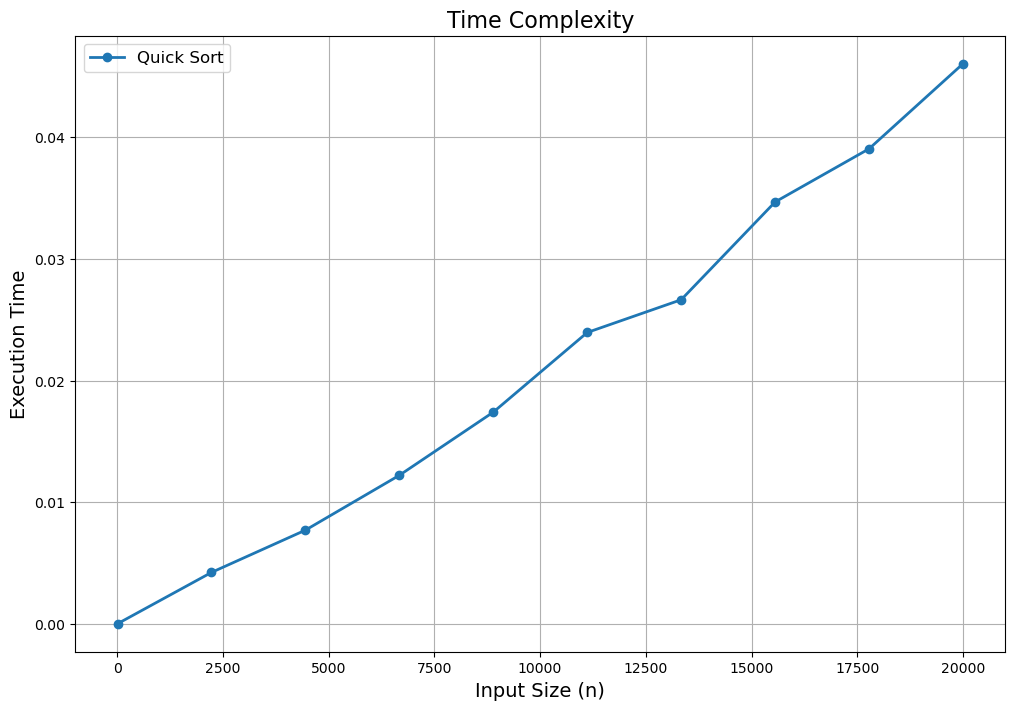

In [2]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] < pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i+1], array[high] = array[high], array[i+1]
    return i + 1

def quickSort(array, low = None, high = None):
    if low is None: 
        low = 0 
    if high is None: 
        high = len(array) - 1 
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

input_sizes = np.linspace(10,20001,10)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    quickSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Quick Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

### Tri par fusion : 

Le tri par fusion est un autre algorithme « diviser pour régner » comme le tri rapide. Il divise récursivement le tableau d'entrée en sous-ensembles plus petits et trie ces sous-ensembles avant de les fusionner à nouveau pour obtenir le tableau trié. Sa durée d'exécution est de O(n * Log(n)), ce qui est optimal pour les algorithmes basés sur la comparaison.

Voici les étapes :

1. Diviser : Diviser la liste ou le tableau récursivement en deux moitiés jusqu'à ce qu'il ne soit plus possible de le diviser.
2. Conquérir : chaque sous-réseau est trié individuellement à l'aide de l'algorithme de tri par fusion.
3. Fusionner : Les sous-réseaux triés sont à nouveau fusionnés dans l'ordre trié. Le processus se poursuit jusqu'à ce que tous les éléments des deux sous-réseaux aient été fusionnés.

En pratique, de manière récursive, cela fonctionnerait comme suit :
 
1. Diviser le tableau en deux
2. Appeler le tri par fusion sur chaque moitié pour les trier récursivement
3. Fusionner les deux moitiés en un seul tableau trié

FUNCTION mergeSort(arr):
    IF LENGTH(arr) > 1 THEN:
        // Split the array into two halves
        left_array = arr[0 : LENGTH(arr) // 2]    // Left half
        right_array = arr[LENGTH(arr) // 2 : ]    // Right half
        
        // Recursively sort both halves
        mergeSort(left_array)
        mergeSort(right_array)

        i = 0  // Index for left array
        j = 0  // Index for right array
        k = 0  // Index for merged array

        // Merge the two halves in sorted order
        WHILE i < LENGTH(left_array) AND j < LENGTH(right_array) DO:
            IF left_array[i] < right_array[j] THEN:
                arr[k] = left_array[i]          // Add element from left array
                i = i + 1                        // Move to the next element in left array
            ELSE:
                arr[k] = right_array[j]         // Add element from right array
                j = j + 1                        // Move to the next element in right array
            k = k + 1                            // Move to the next position in merged array

        // Add remaining elements from left_array, if any
        WHILE i < LENGTH(left_array) DO:
            arr[k] = left_array[i]
            i = i + 1
            k = k + 1

        // Add remaining elements from right_array, if any
        WHILE j < LENGTH(right_array) DO:
            arr[k] = right_array[j]
            j = j + 1
            k = k + 1
END FUNCTION

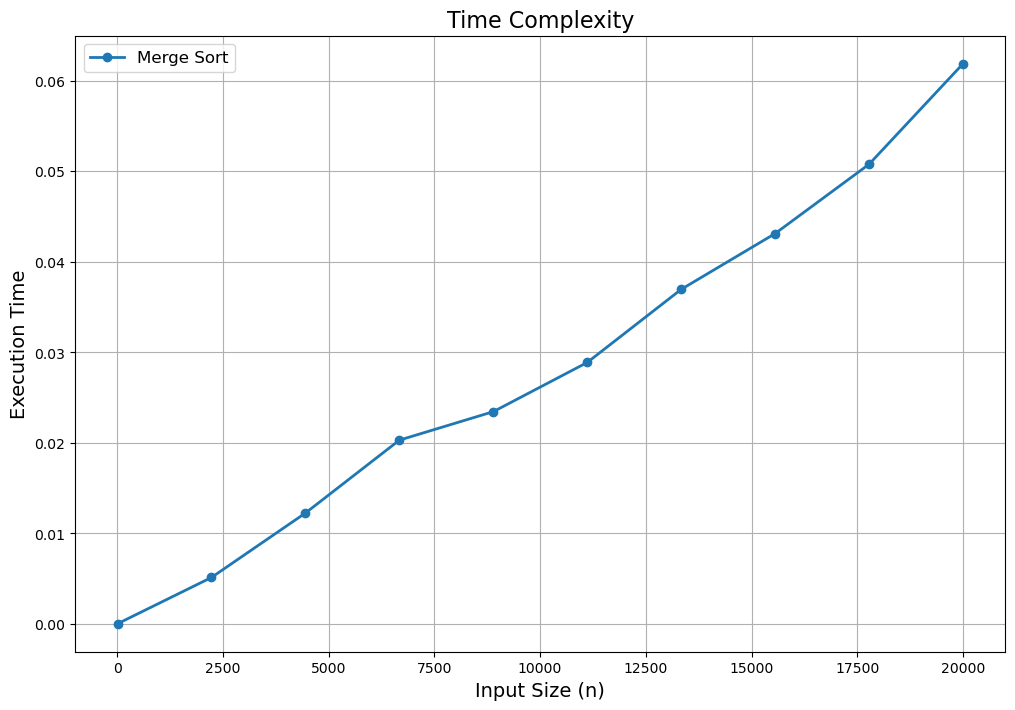

In [3]:
def mergeSort(arr):
    if len(arr) > 1:
        #Split Arrays
        left_array = arr[:len(arr)//2]
        right_array = arr[len(arr)//2:]
        
        #recursively further split the arrays
        mergeSort(left_array)
        mergeSort(right_array)

        i = 0 #left array index
        j = 0 #right array index
        k = 0 #merged array index

        #Merge the arrays in sorted order
        while i < len(left_array) and j < len(right_array):
            if left_array[i] < right_array[j]:
                arr[k] = left_array[i]
                i += 1
            else:
                arr[k] = right_array[j]
                j += 1
            k += 1

        #Add remaining elements to the merged array 
        while i < len(left_array):
            arr[k] = left_array[i]
            i += 1
            k += 1
        while j < len(right_array):
            arr[k] = right_array[j]
            j += 1
            k += 1

input_sizes = np.linspace(10,20001,10)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    mergeSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Merge Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 
        

Pour mon cinquième algorithme de tri, je vais choisir Heap Sort. Il s'agit d'un tri par comparaison basé sur la structure binaire du tas. Il peut être considéré comme une optimisation du tri par sélection, qui consiste à trouver l'élément maximal et à l'échanger avec le dernier, puis à répéter le processus pour les éléments restants. Dans le tri par tas, nous utilisons un tas binaire (arbre binaire) afin de pouvoir trouver et déplacer rapidement l'élément maximal en O(Log n) au lieu de O(n), ce qui permet d'obtenir une complexité temporelle de O(n Log n). 

Dans un tas binaire, la valeur de chaque nœud doit être inférieure ou égale à la valeur de ses nœuds fils. Le nœud ayant la plus petite valeur se trouve donc au sommet ou à la racine de l'arbre. Nous devrons donc créer une classe de tas binaire avec des méthodes d'insertion/suppression...etch qui maintiennent les propriétés requises. 

1. Traiter le tableau comme un arbre binaire complet
2. Construire un Max Heap
3. Trier le tableau en plaçant le plus grand élément à la fin du tableau non trié.

FUNCTION heapify(arr, n, i):
    largest = i                       // Initialize largest as root
    l = 2 * i + 1                     // Left child index
    r = 2 * i + 2                     // Right child index

    // If left child is larger than root
    IF l < n AND arr[l] > arr[largest] THEN:
        largest = l                   // Update largest if left child is larger

    // If right child is larger than largest so far
    IF r < n AND arr[r] > arr[largest] THEN:
        largest = r                   // Update largest if right child is larger

    // If largest is not root
    IF largest != i THEN:
        SWAP arr[i] WITH arr[largest] // Swap the root with the largest child

        // Recursively heapify the affected sub-tree
        heapify(arr, n, largest)      // Call heapify on the affected subtree
END FUNCTION

// Main function to perform heap sort
FUNCTION heapSort(arr):
    n = LENGTH(arr)                  // Get the length of the array

    // Build heap (rearrange array)
    FOR i FROM n // 2 - 1 DOWNTO 0 DO:
        heapify(arr, n, i)           // Build a max heap

    // One by one extract elements from heap
    FOR i FROM n - 1 DOWNTO 1 DO:
        SWAP arr[0] WITH arr[i]      // Move root to end

        // Call max heapify on the reduced heap
        heapify(arr, i, 0)            // Heapify the root element
END FUNCTION

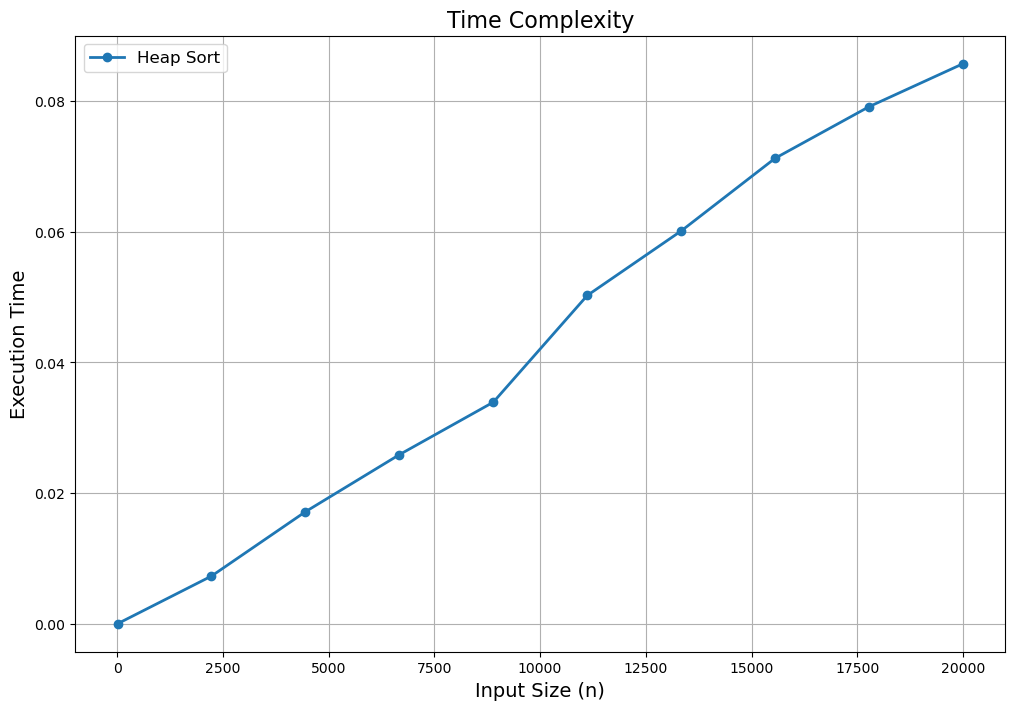

In [4]:
# Python program for implementation of heap Sort

# To heapify a subtree rooted with node i
# which is an index in arr[].
def heapify(arr, n, i):
    
     # Initialize largest as root
    largest = i 
    
    #  left index = 2*i + 1
    l = 2 * i + 1 
    
    # right index = 2*i + 2
    r = 2 * i + 2  

    # If left child is larger than root
    if l < n and arr[l] > arr[largest]:
        largest = l

    # If right child is larger than largest so far
    if r < n and arr[r] > arr[largest]:
        largest = r

    # If largest is not root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap

        # Recursively heapify the affected sub-tree
        heapify(arr, n, largest)

# Main function to do heap sort
def heapSort(arr):
    
    n = len(arr) 

    # Build heap (rearrange array)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):
      
        # Move root to end
        arr[0], arr[i] = arr[i], arr[0] 

        # Call max heapify on the reduced heap
        heapify(arr, i, 0)
        
input_sizes = np.linspace(10,20001,10)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    heapSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Heap Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

Essayons le tri par insertion qui fonctionne en insérant itérativement chaque élément d'une liste non triée à sa position correcte dans une partie triée de la liste. Il a donc une complexité temporelle moyenne de O(n²) et une complexité spatiale de O(1). Bien qu'il soit stable, il n'est pas efficace pour les grandes listes

FUNCTION insertionSort(arr):
    // Start from the second element (index 1)
    FOR i FROM 1 TO LENGTH(arr) - 1 DO:
        j = i                          // Set j to the current index

        // Move elements of arr[0..i-1], that are greater than arr[i],
        // to one position ahead of their current position
        WHILE j > 0 AND arr[j - 1] > arr[j] DO:
            SWAP arr[j - 1] WITH arr[j] // Swap if the previous element is greater
            j = j - 1                   // Move to the previous index
END FUNCTION

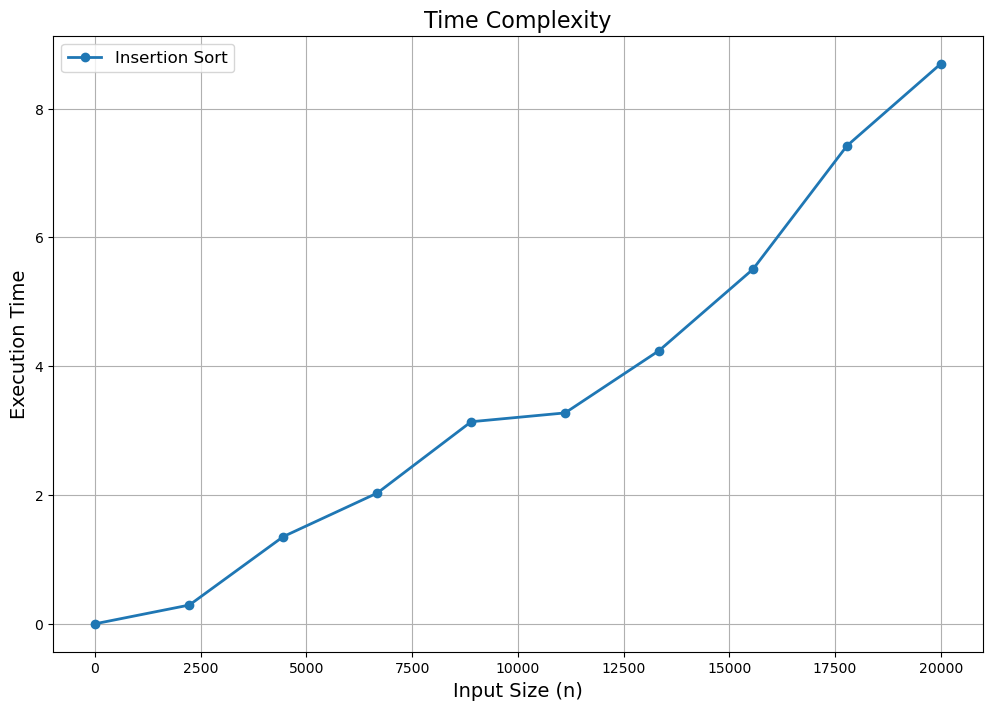

In [5]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        while arr[j - 1] > arr[j] and j > 0:
            arr[j-1], arr[j] = arr[j], arr[j-1]
            j -= 1

input_sizes = np.linspace(10,20001,10)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    insertionSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Insertion Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

La méthode intégrée sort() utilisée en Java et Python est un algorithme de tri hybride dérivé du tri par fusion et du tri par insertion, appelé algorithme timsort. Dans toutes les données du monde réel, il y a probablement un segment du tableau qui est trié, Timsort exploite cela en recherchant des « Runs », c'est-à-dire ce que l'on appelle ces segments triés. Un autre terme clé est « Min Run », qui est la longueur minimale des Runs dans notre tableau. Timsort crée des parcours en utilisant le tri par insertion binaire sur les segments divisés du tableau. Sa complexité temporelle est de O(N LOG N).

FUNCTION insertion_sort(arr, left = 0, right = None):
    IF right IS None THEN:
        right = LENGTH(arr) - 1      // Set right to the last index if not provided

    // Iterate through the array, starting from the second element
    FOR i FROM left + 1 TO right DO:
        key_item = arr[i]             // Select the current element
        j = i - 1                      // Start comparing with the previous element

        // Shift elements that are greater than key_item to the right
        WHILE j >= left AND arr[j] > key_item DO:
            arr[j + 1] = arr[j]       // Shift element to the next position
            j = j - 1                  // Move to the previous element

        arr[j + 1] = key_item          // Place key_item in its correct position

    RETURN arr                        // Return the sorted array

FUNCTION merge(left, right):
    i, j = 0, 0                       // Initialize indices for left and right arrays
    merged = []                       // Initialize an empty array for merged results

    WHILE i < LENGTH(left) AND j < LENGTH(right) DO:
        IF left[i] < right[j] THEN:
            merged.APPEND(left[i])   // Add smaller element to merged array
            i = i + 1                 // Move to the next element in left
        ELSE:
            merged.APPEND(right[j])  // Add smaller element to merged array
            j = j + 1                 // Move to the next element in right

    merged.EXTEND(left[i:])           // Add remaining elements from left array, if any
    merged.EXTEND(right[j:])          // Add remaining elements from right array, if any

    RETURN merged                     // Return the merged array

FUNCTION tim_sort(arr):
    min_run = 32                      // Initialize the minimum run size
    n = LENGTH(arr)                   // Find the length of the array

    // Perform insertion sort on each segment of size min_run
    FOR i FROM 0 TO n WITH STEP min_run DO:
        insertion_sort(arr, i, MIN(i + min_run - 1, n - 1)) // Sort each segment

    size = min_run                    // Start merging from size min_run
    WHILE size < n DO:
        FOR start FROM 0 TO n WITH STEP size * 2 DO:
            midpoint = start + size   // Calculate midpoint for merging
            end = MIN(start + size * 2 - 1, n - 1) // Calculate end index

            // Merge the two subarrays
            merged_array = merge(arr[start:midpoint], arr[midpoint:end + 1])

            // Assign the merged array back to original array
            arr[start:start + LENGTH(merged_array)] = merged_array

        size = size * 2               // Increase merge size for next iteration

    RETURN arr                        // Return the sorted array

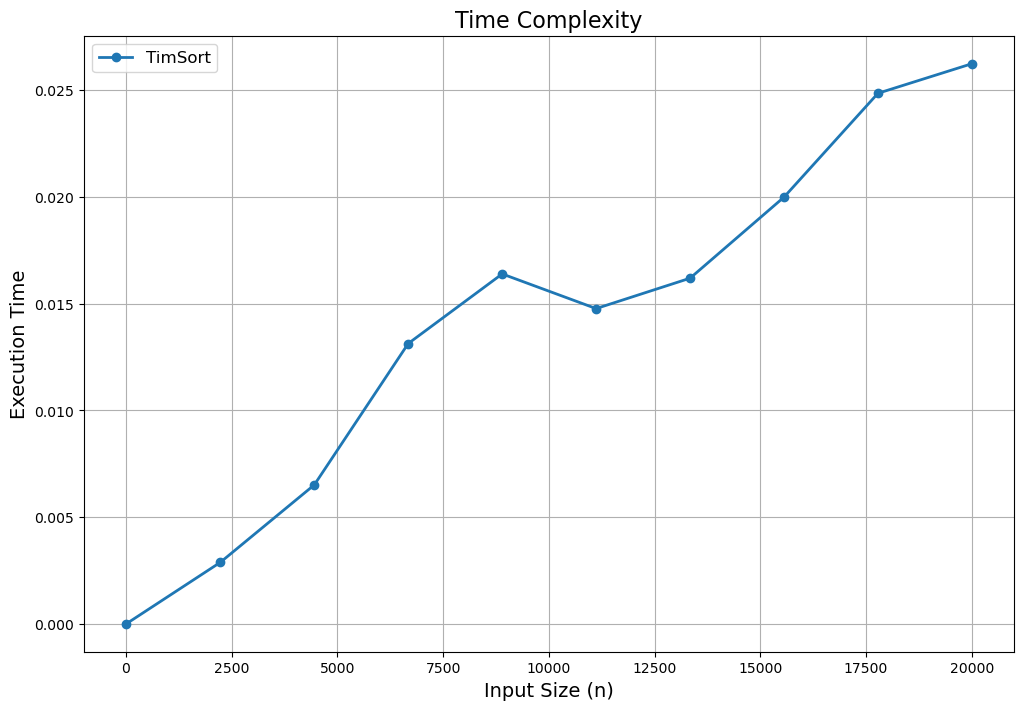

In [6]:
def insertion_sort(arr, left=0, right=None):
    # Base case: if the array is already sorted, do nothing
    if right is None:
        right = len(arr) - 1

    # Iterate through the array, starting from the second element
    for i in range(left + 1, right + 1):
        # Select the current element
        key_item = arr[i]

        # Compare the current element with the previous one
        j = i - 1

        # While the previous element is greater than the current one,
        # shift the previous element to the next position
        while j >= left and arr[j] > key_item:
            arr[j + 1] = arr[j]
            j -= 1

        # Once the loop ends, the previous element is less than or equal to
        # the current element, so place the current element after it
        arr[j + 1] = key_item

    return arr


def merge(left, right):
    i, j = 0, 0
    merged = []

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    merged.extend(left[i:])
    merged.extend(right[j:])

    return merged


def tim_sort(arr):
    # Initialize the minimum run size
    min_run = 32

    # Find the length of the array
    n = len(arr)

    # Traverse the array and do insertion sort on each segment of size min_run
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min(i + min_run - 1, (n - 1)))

    # Start merging from size 32 (or min_run)
    size = min_run
    while size < n:
        # Divide the array into merge_size
        for start in range(0, n, size * 2):
            # Find the midpoint and endpoint of the left and right subarrays
            midpoint = start + size
            end = min((start + size * 2 - 1), (n - 1))

            # Merge the two subarrays
            merged_array = merge(arr[start:midpoint], arr[midpoint:end + 1])

            # Assign the merged array to the original array
            arr[start:start + len(merged_array)] = merged_array

        # Increase the merge size for the next iteration
        size *= 2

    return arr

input_sizes = np.linspace(10,20001,10)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    tim_sort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='TimSort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 